In [9]:
%matplotlib inline
import astropy.utils.data
import geopandas as gpd
import zipfile
from matplotlib import pyplot as plt

### Download sample data from John Deere

In [14]:
print("Downloading and unzipping harvest sample shapefile")
harvestZip = astropy.utils.data.download_file("https://github.com/JohnDeere/SampleData/blob/master/Shapefiles/Export%20From%20MyJohnDeere%20-%20Harvest.zip?raw=true", cache=True, show_progress=True)
with zipfile.ZipFile(harvestZip, 'r') as zip_ref:
    zip_ref.extractall("./.cache/harvest")
harvestShp = "./.cache/harvest/doc/Merriweather Farms-JT-01-Soybeans.shp"
print("OK")

OK


### Take a look at overall data

In [15]:
gdf = gpd.read_file(harvestShp)
gdf.head()

,DISTANCE,SWATHWIDTH,VRYIELDVOL,SECTIONID,Crop,WetMass,Moisture,Time,Heading,VARIETY,Elevation,IsoTime,geometry
0,0.034447,5.0,0.0,1260,174,0.0,4.56,9/19/2016 4:45:10 PM,286.148407,23A42,786.450003,2016-09-19T16:45:10.000Z,POINT Z (-93.15027 41.66636 0.00000)
1,0.034447,5.0,0.0,1261,174,0.0,4.56,9/19/2016 4:45:10 PM,286.148407,23A42,786.450003,2016-09-19T16:45:10.000Z,POINT Z (-93.15026 41.66637 0.00000)
2,0.034447,5.0,0.0,1262,174,0.0,4.56,9/19/2016 4:45:10 PM,286.148407,23A42,786.450003,2016-09-19T16:45:10.000Z,POINT Z (-93.15026 41.66639 0.00000)
3,0.034447,5.0,0.0,1263,174,0.0,4.56,9/19/2016 4:45:10 PM,286.148407,23A42,786.450003,2016-09-19T16:45:10.000Z,POINT Z (-93.15025 41.66640 0.00000)
4,0.034447,5.0,0.0,1264,174,0.0,4.56,9/19/2016 4:45:10 PM,286.148407,23A42,786.450003,2016-09-19T16:45:10.000Z,POINT Z (-93.15025 41.66641 0.00000)


In [16]:
gdf.describe()

,DISTANCE,SWATHWIDTH,VRYIELDVOL,SECTIONID,Crop,WetMass,Moisture,Heading,Elevation
count,40960.000000,40960.0,40960.000000,40960.000000,40960.0,40960.000000,40960.000000,40960.000000,40960.000000
mean,5.356099,5.0,78.050355,1262.496753,174.0,4698.983787,12.833751,187.950544,784.168197
std,0.914692,0.0,43.924025,1.703171,0.0,2647.980881,1.177402,100.498766,1.239706
min,0.034447,5.0,0.000000,1260.000000,174.0,0.000000,0.000000,0.005000,779.629137
25%,5.025353,5.0,72.372119,1261.000000,174.0,4359.846020,12.240000,75.226874,783.539321
50%,5.546258,5.0,79.598112,1262.000000,174.0,4788.663987,12.870000,196.745282,784.368925
75%,5.924525,5.0,84.991287,1264.000000,174.0,5113.463083,13.610000,255.426532,784.959925
max,12.501638,5.0,1666.394384,1265.000000,174.0,100000.000000,15.950000,359.945282,787.064558


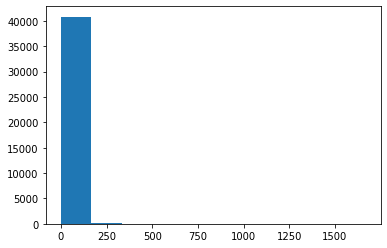

In [18]:
hist = plt.hist(gdf["VRYIELDVOL"])

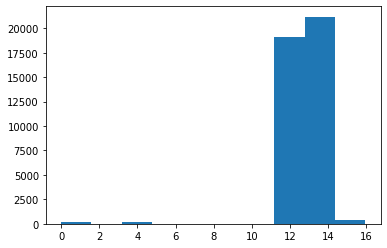

In [23]:
hist = plt.hist(gdf["Moisture"])

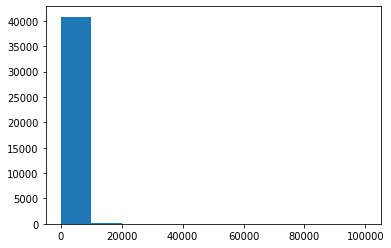

In [24]:
hist = plt.hist(gdf["WetMass"])

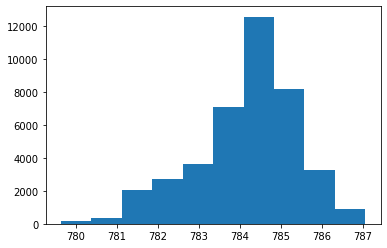

In [25]:
hist = plt.hist(gdf["Elevation"])

#### Elevation map (harvest)

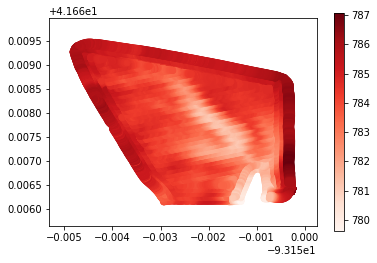

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(1)
bounds = gdf.geometry.total_bounds
ax.set_xlim([bounds[0]-0.0005, bounds[2]+0.0005])
ax.set_ylim([bounds[1]-0.0005, bounds[3]+0.0005])
gdf.plot(ax=ax, column='Elevation', cmap='Reds', figsize=(50, 50), legend=True)
plt.show()

Note: There seems to have a time shift between sensor acquisition and position acquisition, but it seems smaller than lag in seeding

#### Yield

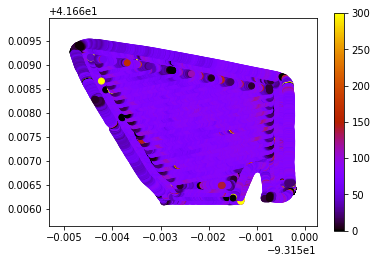

In [38]:
f, ax = plt.subplots(1)
bounds = gdf.geometry.total_bounds
ax.set_xlim([bounds[0]-0.0005, bounds[2]+0.0005])
ax.set_ylim([bounds[1]-0.0005, bounds[3]+0.0005])
gdf.plot(ax=ax, column='VRYIELDVOL', cmap='gnuplot', figsize=(50, 50), legend=True, vmax=300)
plt.show()

#### Moisture

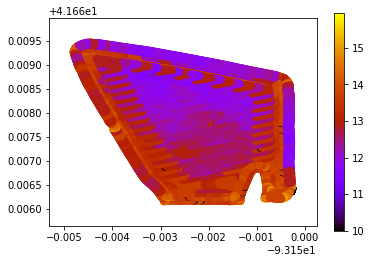

In [39]:
f, ax = plt.subplots(1)
bounds = gdf.geometry.total_bounds
ax.set_xlim([bounds[0]-0.0005, bounds[2]+0.0005])
ax.set_ylim([bounds[1]-0.0005, bounds[3]+0.0005])
gdf.plot(ax=ax, column='Moisture', cmap='gnuplot', figsize=(50, 50), legend=True, vmin=10)
plt.show()

### Take a look at yield sensors

#### Are yield sensors equal?

In [41]:
import seaborn as sns
sns.set()

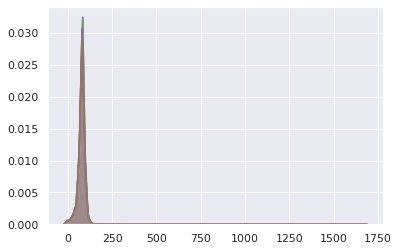

In [42]:
for sid in gdf['SECTIONID'].unique():
    sns.kdeplot(gdf.loc[gdf['SECTIONID']==sid]["VRYIELDVOL"], shade=True, legend=False)

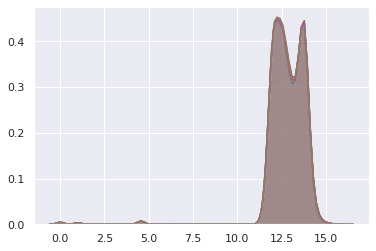

In [43]:
for sid in gdf['SECTIONID'].unique():
    sns.kdeplot(gdf.loc[gdf['SECTIONID']==sid]["Moisture"], shade=True, legend=False)